In [2]:
#my_capstone_project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7043 non-null   object 
 1   tenure                       7043 non-null   int64  
 2   PhoneService                 7043 non-null   object 
 3   Contract                     7043 non-null   object 
 4   PaperlessBilling             7043 non-null   object 
 5   PaymentMethod                7043 non-null   object 
 6   MonthlyCharges               7043 non-null   float64
 7   TotalCharges                 7032 non-null   float64
 8   Churn                        7043 non-null   object 
 9   Churn_Rate                   7043 non-null   float64
 10  avg_Monthly_Charges          7043 non-null   float64
 11  avg_Tenure_(in_months)       7043 non-null   float64
 12  Paperless_Adoption_Rate      7043 non-null   float64
 13  Phone Service_Pene

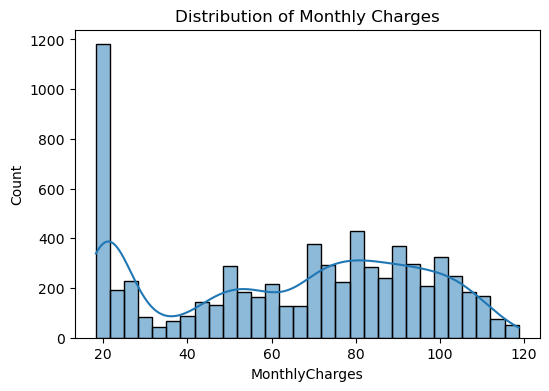

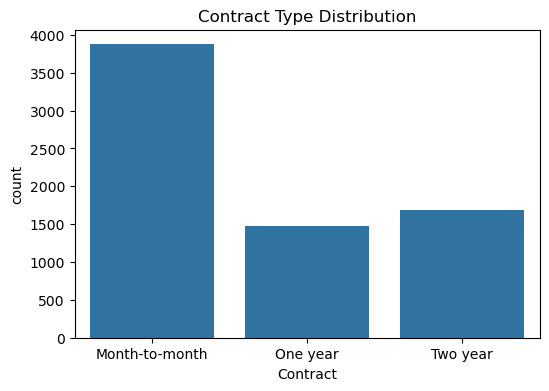

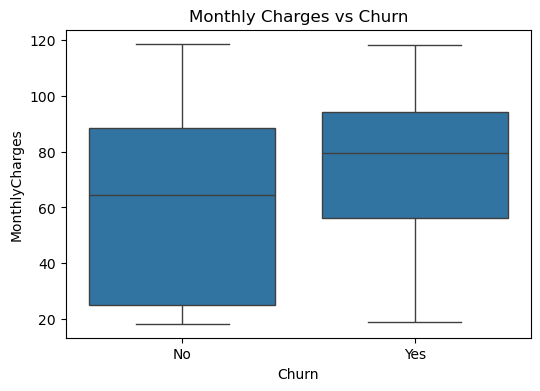

Contract vs Churn:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


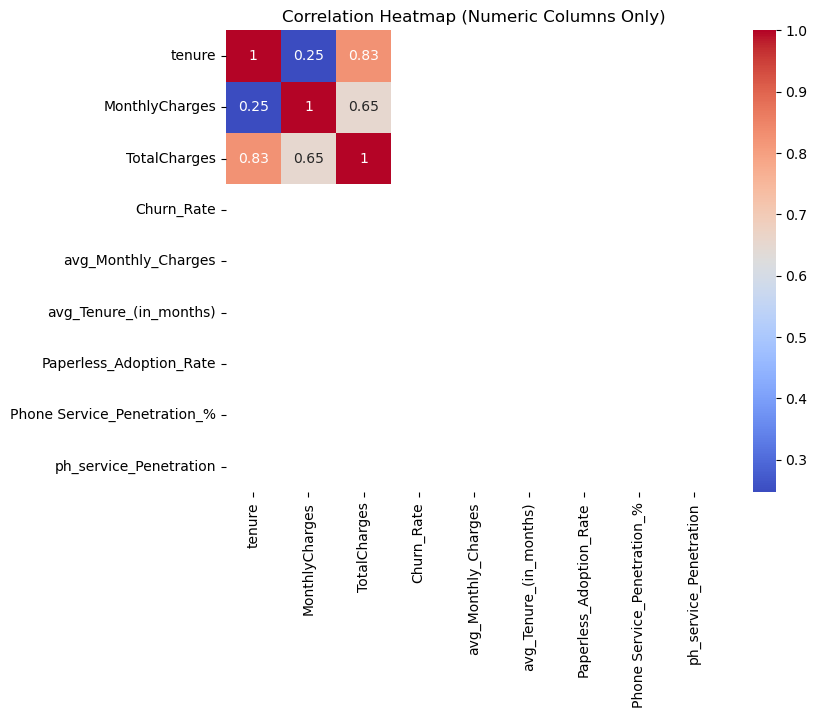

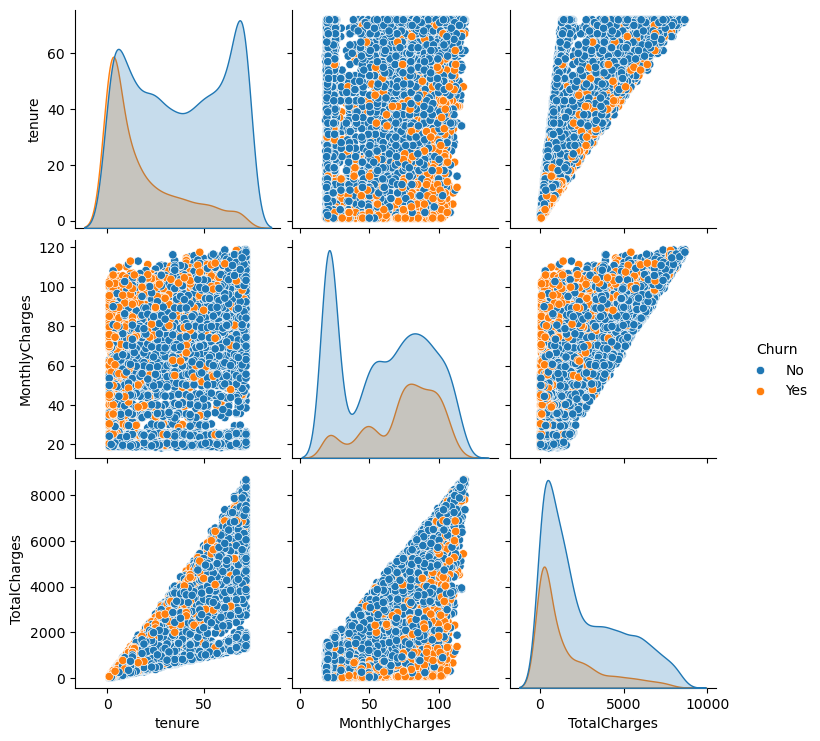

Churn Rate by Contract Type:
 Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


In [16]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Load dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\final_customer_data.csv")

# -----------------------------
# 1️⃣ Data Cleaning
# -----------------------------
# Check info
print(df.info())

# Handle missing values
df = df.dropna()   # or df.fillna(value)

# Remove duplicates
df = df.drop_duplicates()

# Convert data types if needed
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Standardize categorical values (if column exists)
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].str.strip().str.title()

# -----------------------------
# 2️⃣ Univariate Analysis
# -----------------------------
# Histogram for MonthlyCharges
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

# Countplot for Contract type (if exists)
if 'Contract' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Contract', data=df)
    plt.title("Contract Type Distribution")
    plt.show()

# -----------------------------
# 3️⃣ Bivariate Analysis
# -----------------------------
# MonthlyCharges vs Churn (if exists)
if 'Churn' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
    plt.title("Monthly Charges vs Churn")
    plt.show()

# Contract vs Churn (if exists)
if 'Contract' in df.columns and 'Churn' in df.columns:
    contract_churn = pd.crosstab(df['Contract'], df['Churn'])
    print("Contract vs Churn:\n", contract_churn)

# -----------------------------
# 4️⃣ Multivariate Analysis
# -----------------------------
# Heatmap for correlations (numeric only)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# Pairplot for multiple variables (if Churn exists)
if 'Churn' in df.columns:
    sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']], hue='Churn')
    plt.show()

# -----------------------------
# ✅ Conclusion & Findings
# -----------------------------
if 'Contract' in df.columns and 'Churn' in df.columns:
    churn_rate_contract = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean())
    print("Churn Rate by Contract Type:\n", churn_rate_contract)